<a href="https://colab.research.google.com/github/Weizhuo-Zhang/ML_coursera/blob/master/hands_on_ML/4_training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 四、训练模型

## 线性回归

## 正规方程 (The Normal Equation)

为了找到最小化损失函数的 $\theta$ 值，可以采用公式解，换句话说，就是可以通过解正规方程直
接得到最后的结果。
公式 4-4：正规方程

$$\hat{\theta} = (X^T \cdot X)^{-1} \cdot X^T \cdot y$$

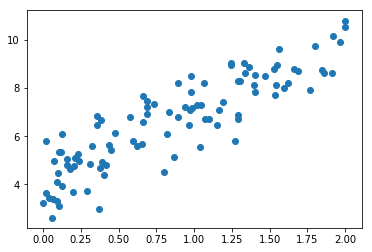

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y)
plt.show()

现在让我们使用正规方程来计算 $\hat{\theta}$ ，我们将使用 **`Numpy`** 的线性代数模块（ `np.linalg` ）中的 `inv()` 函数来计算矩阵的逆，以及 `dot()` 方法来计算矩阵的乘法。

In [2]:
X_b = np.c_[np.ones((100,  1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.17337416]
 [2.85493871]]


现在我们能够使用 $\hat{\theta}$ 来进行预测

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[4.17337416]
 [9.88325159]]


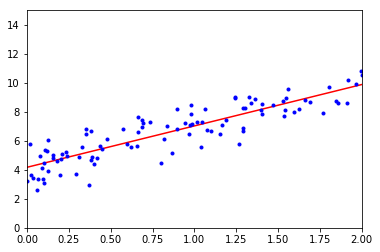

In [4]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

使用下面的 **`Scikit-Learn`** 代码可以达到相同的效果：

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.17337416] [[2.85493871]]
[[4.17337416]
 [9.88325159]]


###  计算复杂度

正规方程需要计算矩阵 $X^T \cdot X$ 的逆，它是一个 $n*n$ 的矩阵（$n$ 是特征的个数）。这样一个矩阵求逆的运算复杂度大约在 $O(n^{2.4})$ 到 $O(n^3)$ 之间，具体值取决于计算方式。换句话说，如果你将你的特征个数翻倍的话，其计算时间大概会变为原来的 $5.3（ 2^{2.4}）$到 $8（ 2^3）$倍。

当特征的个数较大的时候（例如：特征数量为 100000），正规方程求解将会非常慢。

有利的一面是，这个方程在训练集上对于每一个实例来说是线性的，其复杂度为 $O(m)$，因此只要有能放得下它的内存空间，它就可以对大规模数据进行训练。同时，一旦你得到了线性回归模型（通过解正规方程或者其他的算法），进行预测是非常快的。因为模型中计算复杂度对于要进行预测的实例数量和特征个数都是线性的。 换句话说，当实例个数变为原来的两倍多的时候（或特征个数变为原来的两倍多），预测时间也仅仅是原来的两倍多。

## 梯度下降

梯度下降是一种非常通用的优化算法，它能够很好地解决一系列问题。梯度下降的整体思路是通过的迭代来逐渐调整参数使得损失函数达到最小值。

假设浓雾下，你迷失在了大山中，你只能感受到自己脚下的坡度。为了最快到达山底，一个最好的方法就是沿着坡度最陡的地方下山。这其实就是梯度下降所做的：它计算误差函数关于参数向量 $\theta$ 的局部梯度，同时它沿着梯度下降的方向进行下一次迭代。当梯度值为零的时候，就达到了误差函数最小值 。

具体来说，开始时，需要选定一个随机的 $\theta$ （这个值称为随机初始值），然后逐渐去改进它，每一次变化一小步，每一步都试着降低损失函数（例如：均方差损失函数），直到算法收敛
到一个最小值（如图：4-3）。

**提示:**

当我们使用梯度下降的时候，应该确保所有的特征有着相近的尺度范围（例如：使用 **`Scikit-Learn`** 的 `StandardScaler` 类），否则它将需要很长的时间才能够收敛。

###   批量梯度下降

In [6]:
eta = 0.1 # Learning Rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients
  
print(theta)

[[4.17337416]
 [2.85493871]]


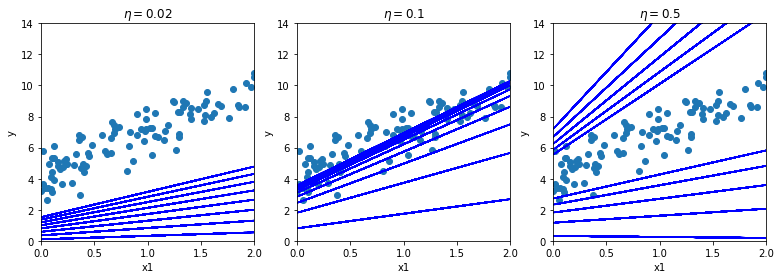

In [7]:
# 计算在不同的learning rate下，梯度下降前10步运算
eta_list = [0.02, 0.1, 0.5]
theta_original = np.random.randn(2,1)
counter = 0
plt.figure(figsize=(13, 4))
for eta in eta_list:
  counter += 1
  theta = theta_original
  plt.subplot(1,3,counter)
  plt.xlim(0,2)
  plt.ylim(0,14)
  plt.xlabel('x1')
  plt.ylabel('y')
  plt.scatter(X, y)
  plt.plot(X, X_b.dot(theta), 'b-')
  for iteration in range(10):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    plt.plot(X, X_b.dot(theta), 'b-')

  plt.title("$\eta={0}$".format(eta))
plt.show()

**收敛速率：**

当损失函数是凸函数，同时它的斜率不能突变（就像均方差损失函数那样），那么它的批量梯度下降算法固定学习率之后，它的收敛速率是 $O(\frac{1}{iterations})$  。换句话说，如果你将容差 $\epsilon$ 缩小 10 倍后（这样可以得到一个更精确的结果），这个算法的迭代次数大约会变成原来的 10 倍。

### 随机梯度下降

批量梯度下降的最要问题是计算每一步的梯度时都需要使用整个训练集，这导致在规模较大的数据集上，其会变得非常的慢。与其完全相反的随机梯度下降，在每一步的梯度计算上只随机选取训练集中的一个样本。很明显，由于每一次的操作都使用了非常少的数据，这样使
得算法变得非常快。由于每一次迭代，只需要在内存中有一个实例，这使随机梯度算法可以在大规模训练集上使用。

另一方面，由于它的随机性，与批量梯度下降相比，其呈现出更多的不规律性：它到达最小值不是平缓的下降，损失函数会忽高忽低，只是在大体上呈下降趋势。随着时间的推移，它会非常的靠近最小值，但是它不会停止在一个值上，它会一直在这个值附近摆动（如图 4-
9）。因此，当算法停止的时候，最后的参数还不错，但不是最优值。

当损失函数很不规则时（如图 4-6），随机梯度下降算法能够跳过局部最小值。因此，随机梯度下降在寻找全局最小值上比批量梯度下降表现要好。

虽然随机性可以很好的跳过局部最优值，但同时它却不能达到最小值。解决这个难题的一个办法是逐渐降低学习率。 开始时，走的每一步较大（这有助于快速前进同时跳过局部最小值），然后变得越来越小，从而使算法到达全局最小值。 这个过程被称为模拟退火，因为它
类似于熔融金属慢慢冷却的冶金学退火过程。 决定每次迭代的学习率的函数称为 `learning schedule` 。 如果学习速度降低得过快，你可能会陷入局部最小值，甚至在到达最小值的半路就停止了。 如果学习速度降低得太慢，你可能在最小值的附近长时间摆动，同时如果过早停止训练，最终只会出现次优解。

下面的代码使用一个简单的 `learning schedule` 来实现随机梯度下降：

In [8]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch * m + i)
    theta=theta - eta*gradients
    
print(theta)

[[4.16486147]
 [2.83702071]]


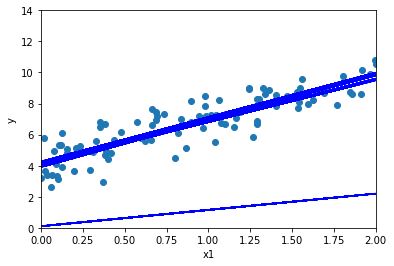

In [9]:
# 随机梯度下降前10步运算
n_epochs = 10
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1)
plt.plot(X, X_b.dot(theta), 'b-')

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch * m + i)
    theta=theta - eta*gradients
  plt.plot(X, X_b.dot(theta), 'b-')

plt.scatter(X, y)
plt.xlim(0,2)
plt.ylim(0,14)
plt.xlabel('x1')
plt.ylabel('y') 
plt.show()

通过使用 **`Scikit-Learn`** 完成线性回归的随机梯度下降，你需要使用 `SGDRegressor` 类，这个类默认优化的是均方差损失函数。下面的代码迭代了 50 代，其学习率 $\eta$ 为0.1（ `eta0=0.1` ），使用默认的 `learning schedule` （与前面的不一样），同时也没有添加任何正则项（ `penalty = None` ）：

In [10]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor( n_iter_no_change=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.15823829] [2.84786125]


### 小批量梯度下降

在迭代的每一步，批量梯度使用整个训练集，随机梯度时候用仅仅一个实例，在小批量梯度下降中，它则使用一个随机的小型实例集。它比随机梯度的主要优点在于你可以通过矩阵运算的硬件优化得到一个较好的训练表现，尤其当你使用 GPU 进行运算的时候。

## 多项式回归

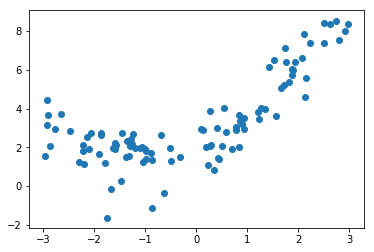

In [11]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)
plt.show()

很清楚的看出，直线不能恰当的拟合这些数据。于是，我们使用 `Scikit-Learning` 的 `PolynomialFeatures` 类进行训练数据集的转换，让训练集中每个特征的平方（2 次多项式）作为新特征（在这种情况下，仅存在一个特征）：

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-1.27990345]
[-1.27990345  1.63815284]


In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[2.03480762] [[1.02092386 0.47053635]]


(-1.6411193865950036, 8.549889424151585)

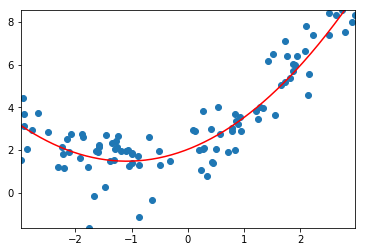

In [14]:
X_line = np.linspace(X.min(), X.max(), 256, endpoint = True)
X_line = X_line.reshape((256,1))
X_line_poly = poly_features.fit_transform(X_line)
y_line = X_line_poly.dot(lin_reg.coef_.T) + lin_reg.intercept_
plt.scatter(X, y)
plt.plot(X_line, y_line, 'r-')
axes = plt.gca()
axes.set_xlim([X.min(), X.max()])
axes.set_ylim([y.min(), y.max()])

### 学习曲线

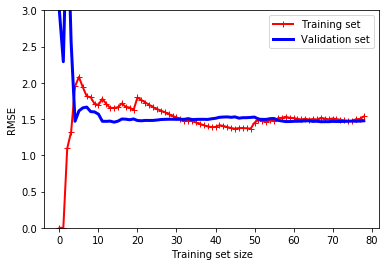

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
    val_errors.append(mean_squared_error(y_val_predict, y_val))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
  plt.xlabel("Training set size")
  plt.ylabel("RMSE")
  plt.ylim(0,3)
  plt.legend(["Training set", "Validation set"])

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

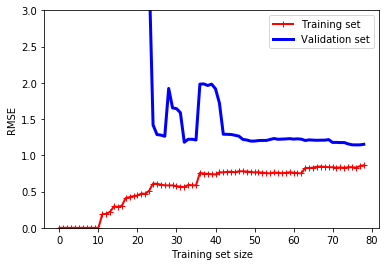

In [16]:
# 10阶多项式模型

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
  ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
  ("sgd_reg", LinearRegression()),
))

plot_learning_curves(polynomial_regression, X, y)

## 线性模型的正则化(Regularization)

正如我们在第一和第二章看到的那样，降低模型的过拟合的好方法是正则化这个模型（即限制它）：模型有越少的自由度，就越难以拟合数据。例如，正则化一个多项式模型，一个简单的方法就是减少多项式的阶数。

### Ridge Regression

岭回归（也称为 **Tikhonov** 正则化）是线性回归的正则化版：在损失函数上直接加上一个正则项$\alpha\sum_{i=1}^{n}\theta_{i}^{2}$ 。这使得学习算法不仅能够拟合数据，而且能够使模型的参数权重尽量的小。注意到这个正则项只有在训练过程中才会被加到损失函数。当得到完成训练的模型后，我们应该使用没有正则化的测量方法去评价模型的表现。

超参数 决定了你想正则化这个模型的强度。如果 那此时的岭回归便变为了线性回归。如果 非常的大，所有的权重最后都接近于零，最后结果将是一条穿过数据平均值的水平直线。

**提示:**

在使用岭回归前，对数据进行放缩（可以使用 `StandardScaler` ）是非常重要的，算法对于输入特征的数值尺度（`scale`）非常敏感。大多数的正则化模型都是这样的。

$$J(\theta)=MSE(\theta)+\alpha\frac{1}{2}\sum_{i=1}^{2}\theta_i^2$$

![ridgeregression](https://raw.githubusercontent.com/Weizhuo-Zhang/ML_coursera/master/hands_on_ML/pics/ridgeregression.png)

In [17]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
print(ridge_reg.predict([[1.5]]))

[[4.79541063]]


In [18]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
print(sgd_reg.predict([[1.5]]))

[4.7754616]


### Lasso  Regression

**Lasso** 回归（也称 **Least Absolute Shrinkage**，或者 **Selection Operator Regression**）是另一种正则化版的线性回归：就像岭回归那样，它也在损失函数上添加了一个正则化项，但是它使用权重向量的 $l_1$ 范数而不是权重向量 $l_2$ 范数平方的一半。

$$J(\theta)=MSE(\theta)+\alpha\sum_{i=1}^{n}\left|\theta_i\right|$$

![lassoregression](https://raw.githubusercontent.com/Weizhuo-Zhang/ML_coursera/master/hands_on_ML/pics/lassoregression.png)